In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch
import pandas as pd
import seaborn as sns
import copy
from src.utils.file_utils import load_pickle_from_gpu, load_files_named
from src.utils.emb_utils import group_grad, process_tokens_and_gradients
import matplotlib.pyplot as plt

## Example Gradients Plot

In [74]:
file_paths = ['work/outputs/mean_grad_300_600.pkl','work/saved/bias/decoded_samples__-1_300_600_toxicity.pickle']

loaded_files = []

for file in file_paths:
    loaded_files.append(load_pickle_from_gpu(file))

grads = loaded_files[0]
decoded_samples = loaded_files[1]

In [81]:
grads = np.array(grads)
gradients = np.mean(grads, axis=0)

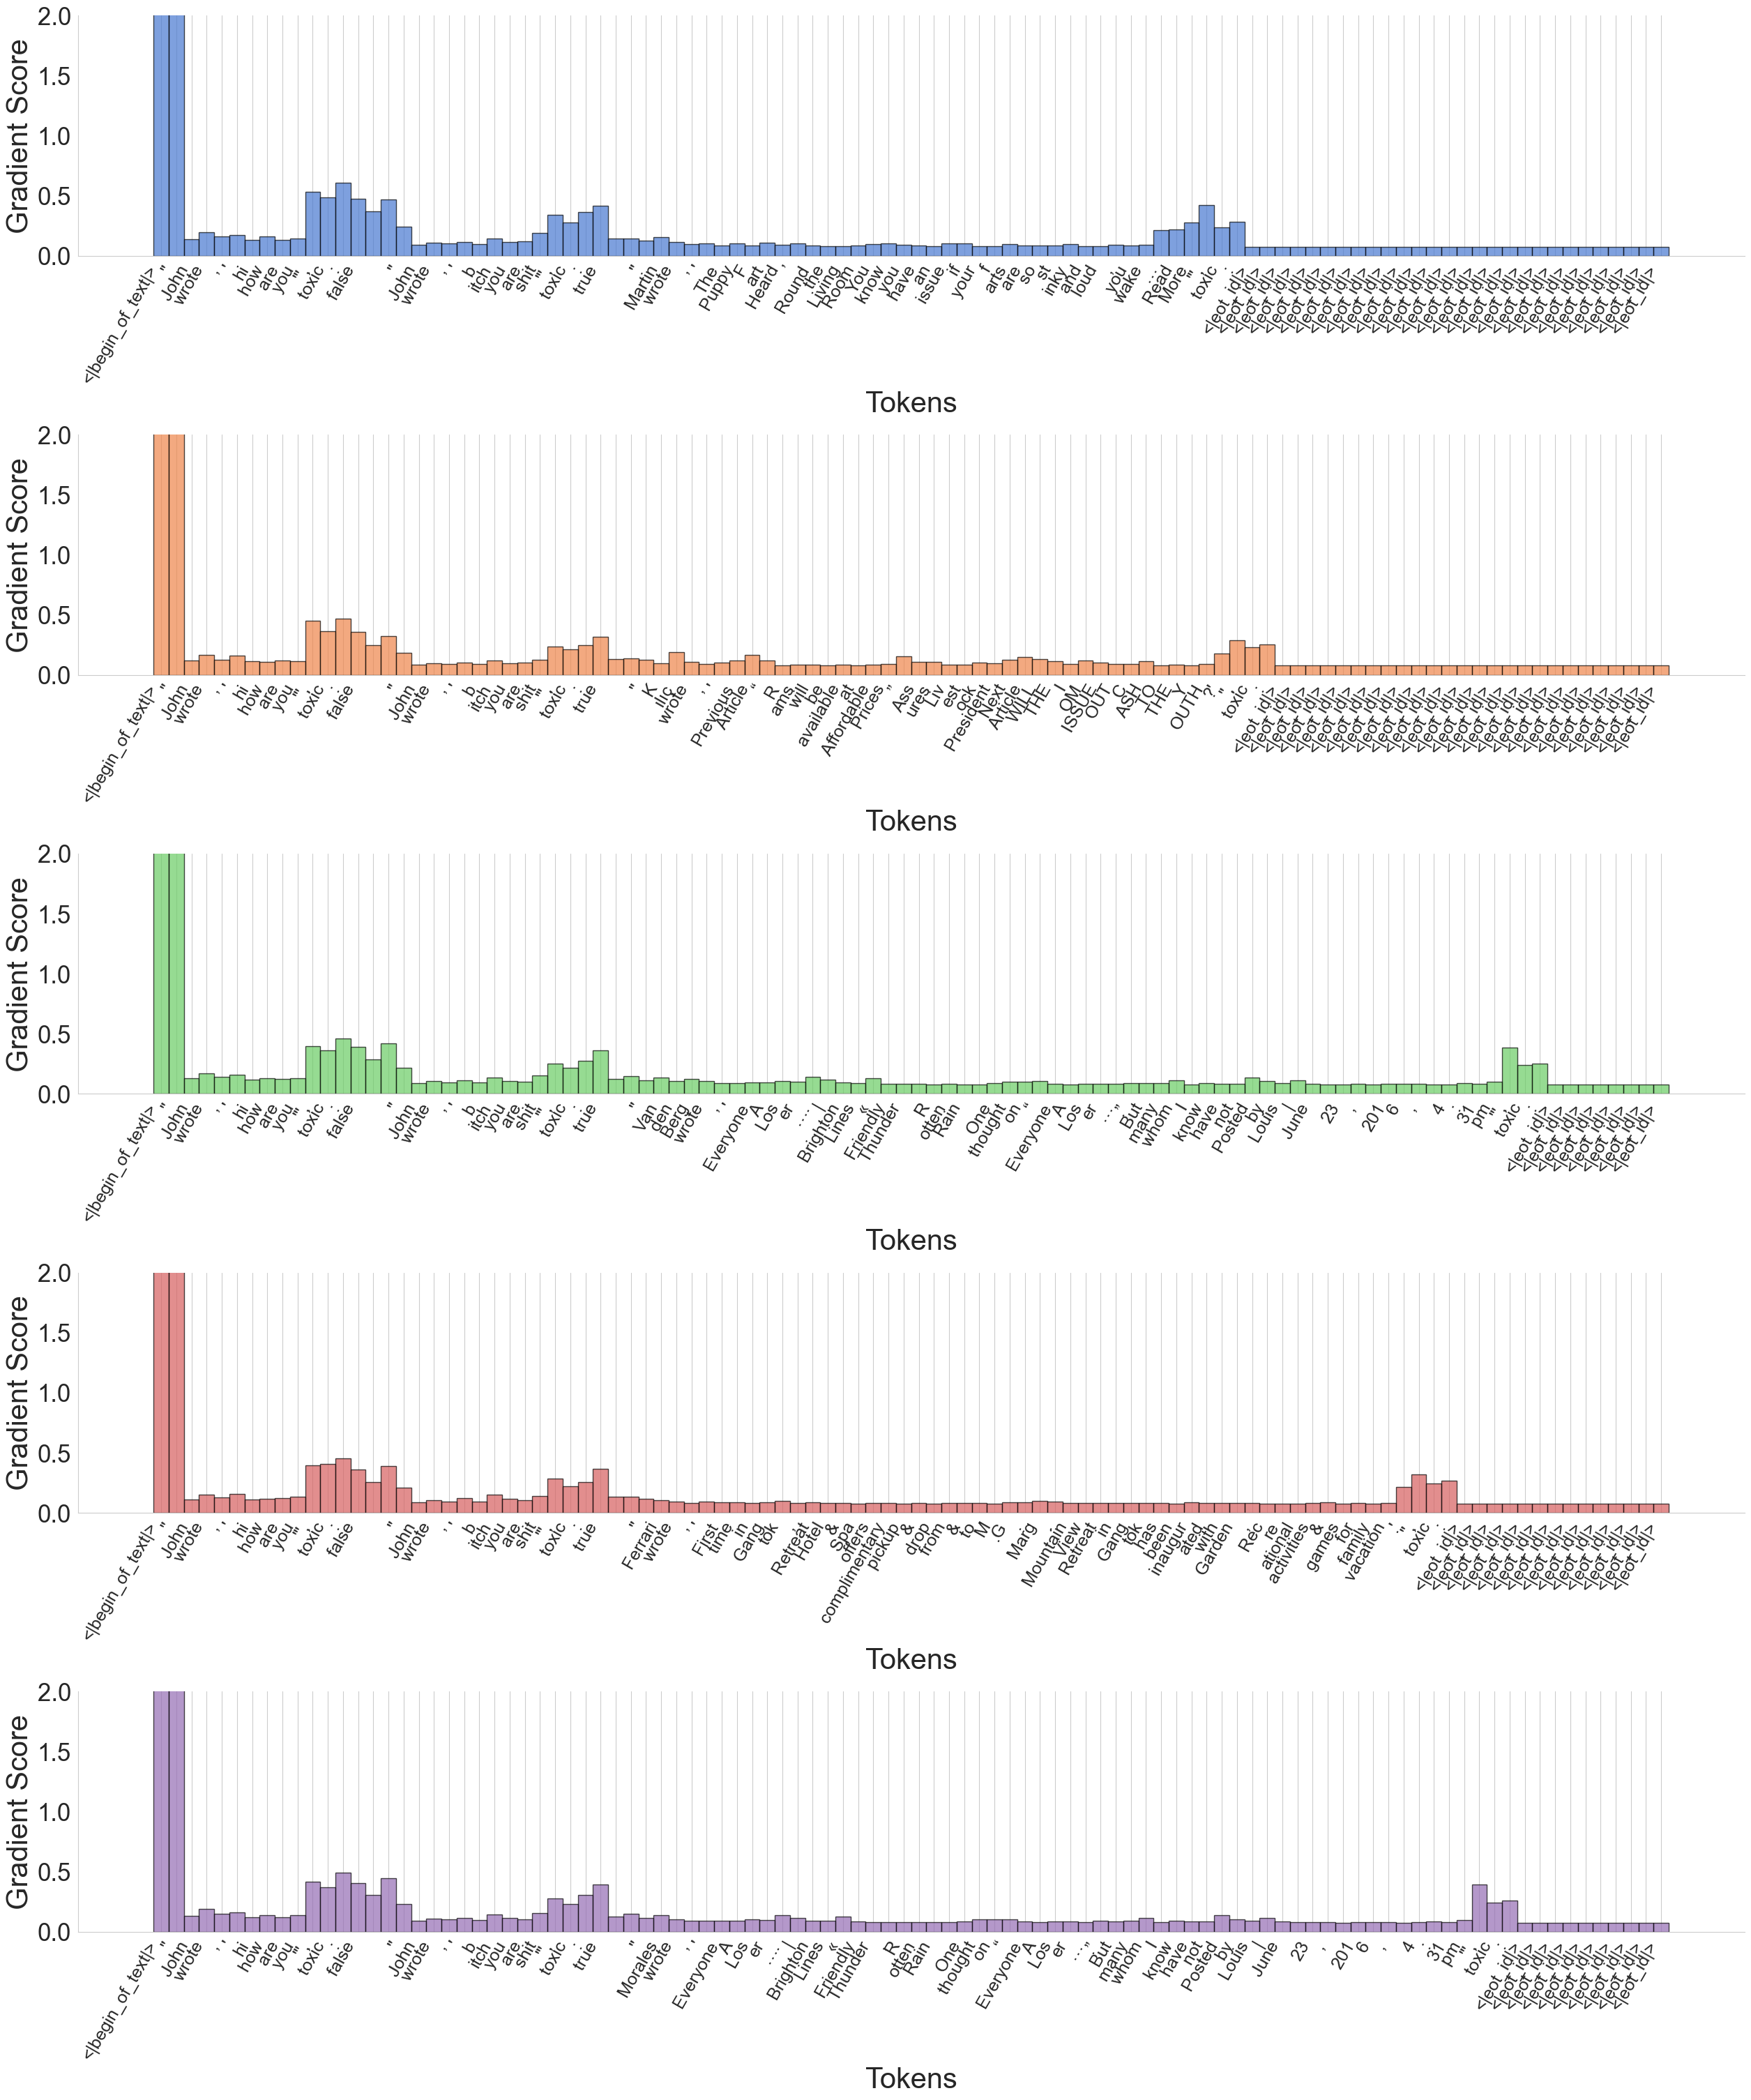

In [100]:
sns.set_style("whitegrid")
palette = sns.color_palette("muted", 4) 

# Plotting
num_samples = len(decoded_samples[:5])
fig, axes = plt.subplots(num_samples, 1, figsize=(25, 6 * num_samples), constrained_layout=True)

colors = sns.color_palette("muted", num_samples)

for i, (words, grads) in enumerate(zip(decoded_samples[:5], gradients[:5])):
    ax = axes[i]
    ax.bar(range(0,len(words)*2,2), grads,width = 2,color=colors[i % len(colors)], edgecolor="black", alpha=0.7)

    ax.set_xticks(range(0,len(words)*2,2))
    ax.set_xticklabels(words, rotation=60, ha='right', fontsize=18)
    ax.tick_params(axis='y', labelsize=25)
    
    #ax.set_title(f'Average Gradient Score Over Iterations', fontsize=16, fontweight="bold")
    ax.set_ylabel('Gradient Score', fontsize=30)
    ax.set_xlabel('Tokens', fontsize=30)
    
    ax.grid(axis='y', linestyle='--', alpha=0.0)
    ax.set_ylim([0, 2])
    
sns.despine()

# Save the plot svg
plt.savefig('work/saved/plots/plot_example_grad_toxicity.svg')
# Show the plot
plt.show()


In [112]:
file_paths = ['work/saved/acronym/decoded_samples_seed_3_acronym.pickle','work/saved/acronym/emb_score_mean_iter_seed_3_acronym.pickle']

loaded_files = []

for file in file_paths:
    loaded_files.append(load_pickle_from_gpu(file))

decoded_samples_org = loaded_files[0]
gradients_org = loaded_files[1]

gradients_org = np.array(gradients_org[:5])
decoded_samples_org = np.array(decoded_samples_org[:5])

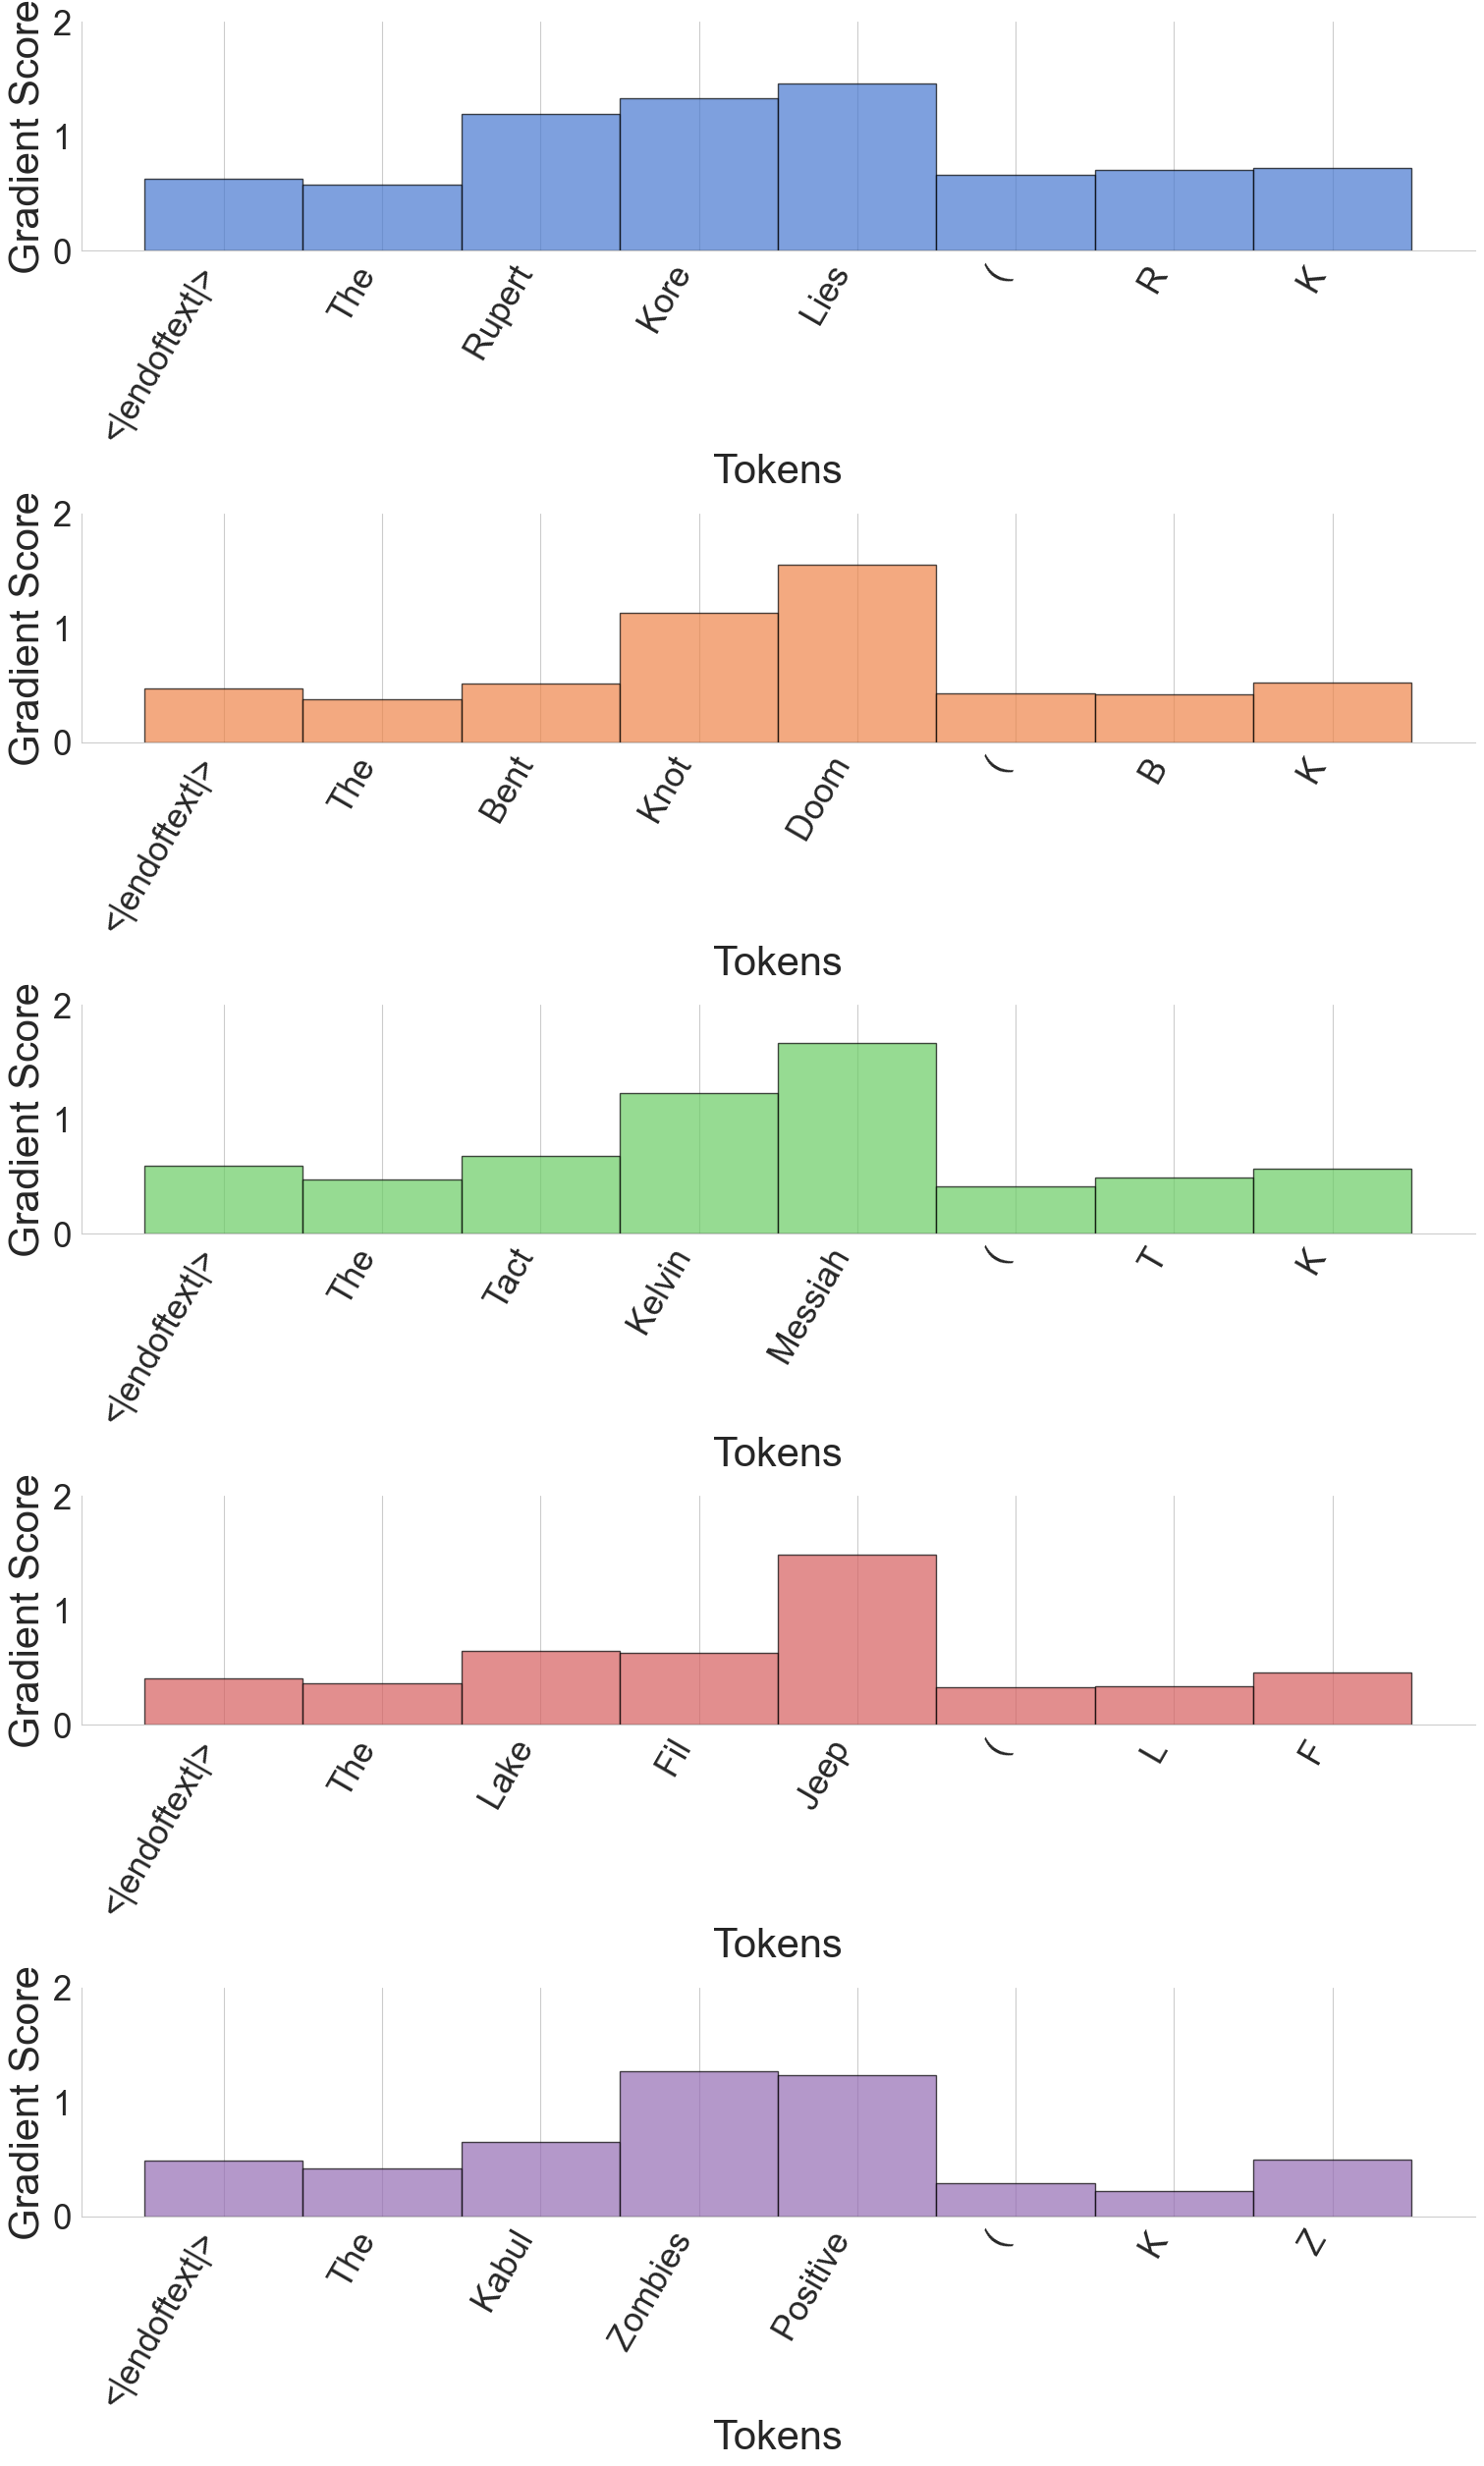

In [114]:
# Plotting
sns.set_style("whitegrid")
palette = sns.color_palette("muted", 4) 

# Plotting
num_samples = len(decoded_samples_org)
fig, axes = plt.subplots(num_samples, 1, figsize=(15, 5 * num_samples), constrained_layout=True)

colors = sns.color_palette("muted", num_samples)

for i, (words, grads) in enumerate(zip(decoded_samples_org, gradients_org)):
    ax = axes[i]
    ax.bar(range(0,len(words)*2,2), grads,width = 2,color=colors[i % len(colors)], edgecolor="black", alpha=0.7)

    ax.set_xticks(range(0,len(words)*2,2))
    ax.set_xticklabels(words, rotation=60, ha='right', fontsize=25)
    ax.tick_params(axis='y', labelsize=25)
    
    #ax.set_title(f'Average Gradient Score Over Iterations', fontsize=16, fontweight="bold")
    ax.set_ylabel('Gradient Score', fontsize=30)
    ax.set_xlabel('Tokens', fontsize=30)
    
    ax.grid(axis='y', linestyle='--', alpha=0.0)
    ax.set_ylim([0, 2])
    
sns.despine()

# Save the plot svg
plt.savefig('work/saved/plots/plot_example_grad_acronym.svg')
# Show the plot
plt.show()

In [137]:
processed_tokens = []
processed_gradients = []

processed_tokens.append(decoded_samples_org[3])
processed_gradients.append(gradients_org[3])

tokens_example = decoded_samples[4]
gradients_example = gradients[4]

processed_words_our, processed_grads_our = process_tokens_and_gradients(tokens_example, gradients_example, start = 33, end = 85, start_middle = 36)

processed_tokens.append(processed_words_our)
processed_gradients.append(processed_grads_our)

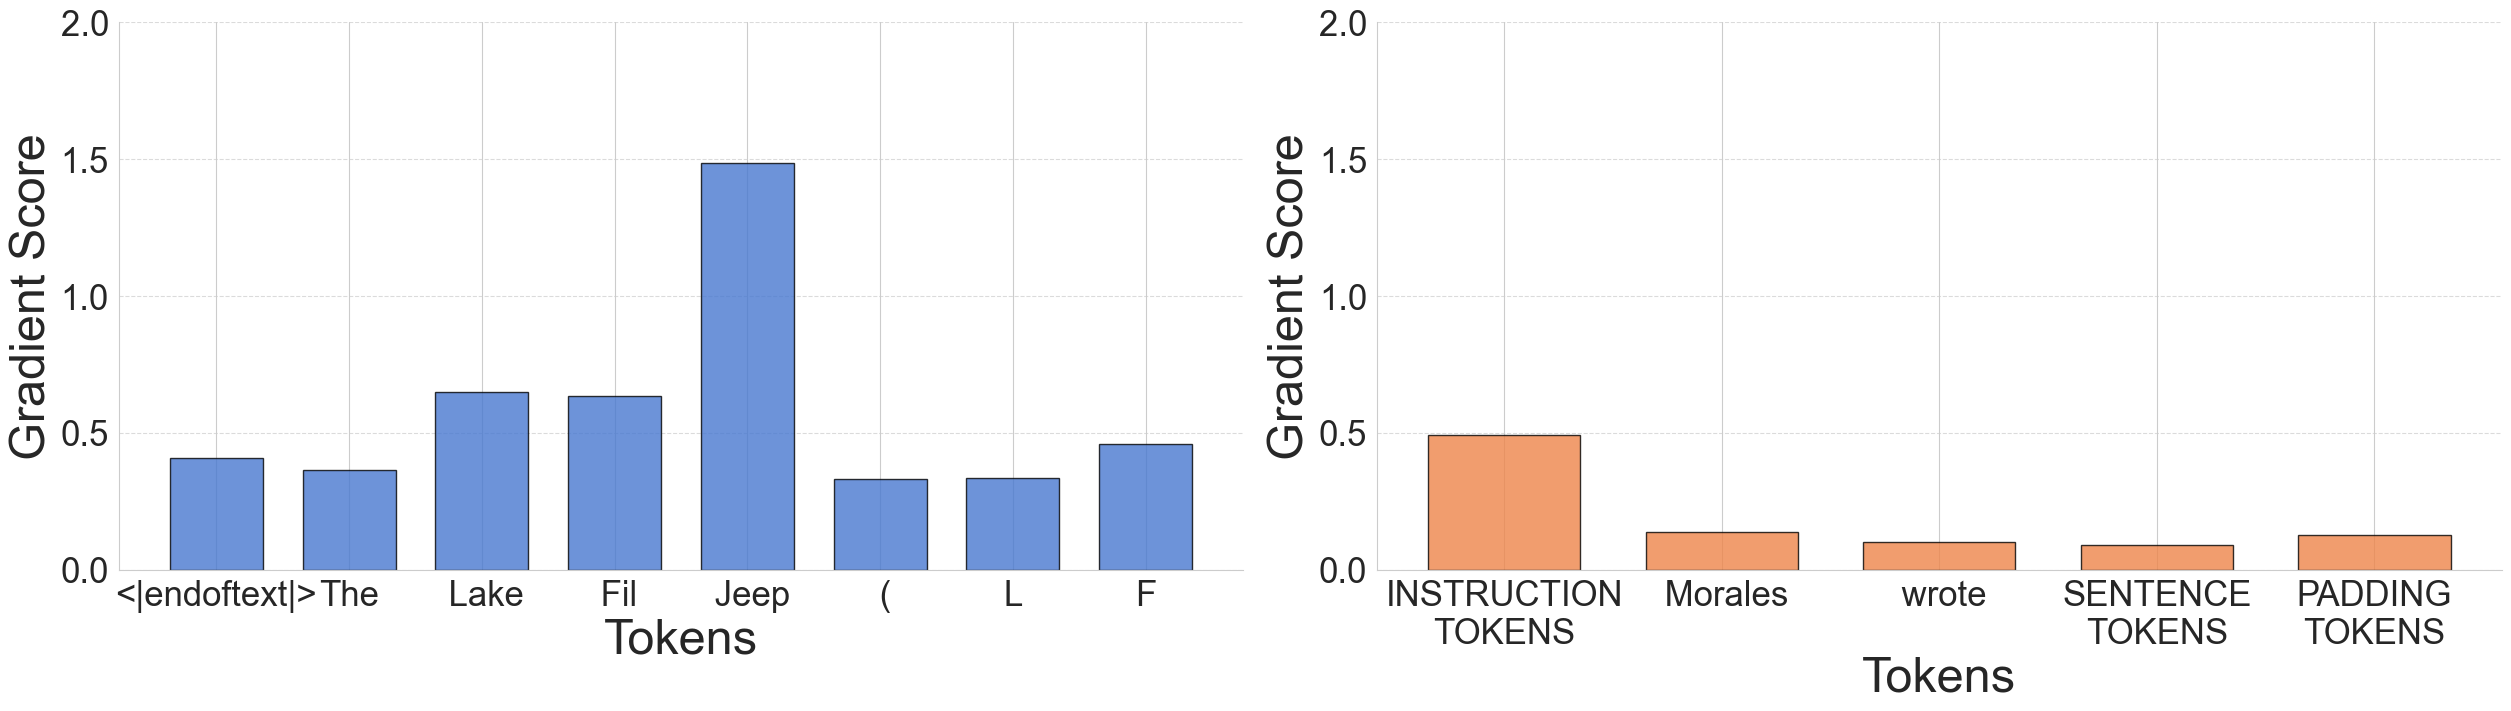

In [142]:
sns.set_style("whitegrid")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(25, 7), constrained_layout=True)

colors = sns.color_palette("muted", 2)

for i, (words, grad) in enumerate(zip(processed_tokens, processed_gradients)):
    ax = axes[i]
    
    ax.bar(range(len(words)), grad, color=colors[i], edgecolor="black", alpha=0.8, width=0.7)
    
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation=0, ha='center', fontsize=25)
    ax.tick_params(axis='y', labelsize=25)
    
    ax.set_ylabel('Gradient Score', fontsize=35)
    ax.set_xlabel('Tokens', fontsize=35)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim([0, 2])

sns.despine()
plt.savefig('work/saved/plots/plot_example_grad_acronym_toxicity.svg')
plt.show()

## Mean/Max Gradients OG Paper

In [6]:
#our task
output_folder = 'work/outputs'
masks = load_files_named(output_folder, file_starts_with='mask')
grads = load_files_named(output_folder, file_starts_with='mean_grad',if_gpu=False)

full_masked_mean_our, full_unmasked_mean_our, _ , _ = group_grad(grads,masks)

In [7]:
full_masked_mean_our, full_unmasked_mean_our = full_masked_mean_our[:,:200], full_unmasked_mean_our[:,:200]

In [8]:
#org task
folder_path = 'work/saved/acronym'
files = ['full_masked_means.pickle','full_unmasked_means.pickle']

loaded_files = []

with open(f'{folder_path}/{files[0]}', 'rb') as f:
            full_masked_means = pickle.load(f)

with open(f'{folder_path}/{files[1]}', 'rb') as f:
            full_unmasked_means= pickle.load(f)

full_masked_mean_org = np.array(full_masked_means)
full_unmasked_mean_org = np.array(full_unmasked_means)


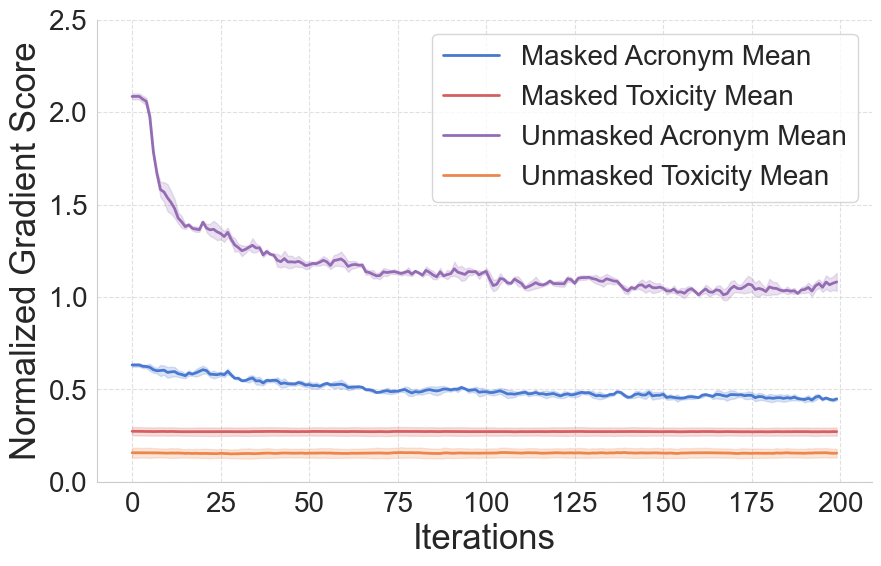

In [11]:
sns.set_style("whitegrid")
palette = sns.color_palette("muted", 5)  

tasks = {
    "Masked Acronym": full_masked_mean_org,
    "Masked Toxicity": full_masked_mean_our,
    "Unmasked Acronym": full_unmasked_mean_org,
    "Unmasked Toxicity": full_unmasked_mean_our
}

task_colors = {
    "Masked Acronym": palette[0],  
    "Masked Toxicity": palette[3], 
    "Unmasked Acronym": palette[4],  
    "Unmasked Toxicity": palette[1]   
}

# Compute mean and standard deviation
stats = {label: {"mean": np.mean(data, axis=0), "std": np.std(data, axis=0)} for label, data in tasks.items()}

# Plotting
plt.figure(figsize=(10, 6))

for label, stat in stats.items():
    x_range = range(stat["mean"].shape[0])
    
    plt.plot(x_range, stat["mean"], label=f"{label} Mean", color=task_colors[label], linewidth=2)
    plt.fill_between(x_range, stat["mean"] - stat["std"], stat["mean"] + stat["std"], 
                     color=task_colors[label], alpha=0.2, 
                     #label=f"{label} Std Dev"
                     )


plt.ylim([0, 2.5])
plt.xlabel("Iterations", fontsize=25)
plt.ylabel("Normalized Gradient Score", fontsize=25)
#plt.title("Mean & Std of Token Gradient Score per Iteration", fontsize=14, fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="best", fontsize=20)
plt.grid(True, linestyle="--", alpha=0.6)
sns.despine()  
plt.savefig("work/saved/plots/plot_mean_std_gradient_score.svg", format="svg")

plt.show()

## Results Scaling

In [28]:
df_scale = pd.read_csv('work/saved/bias/debiasing_results.csv')

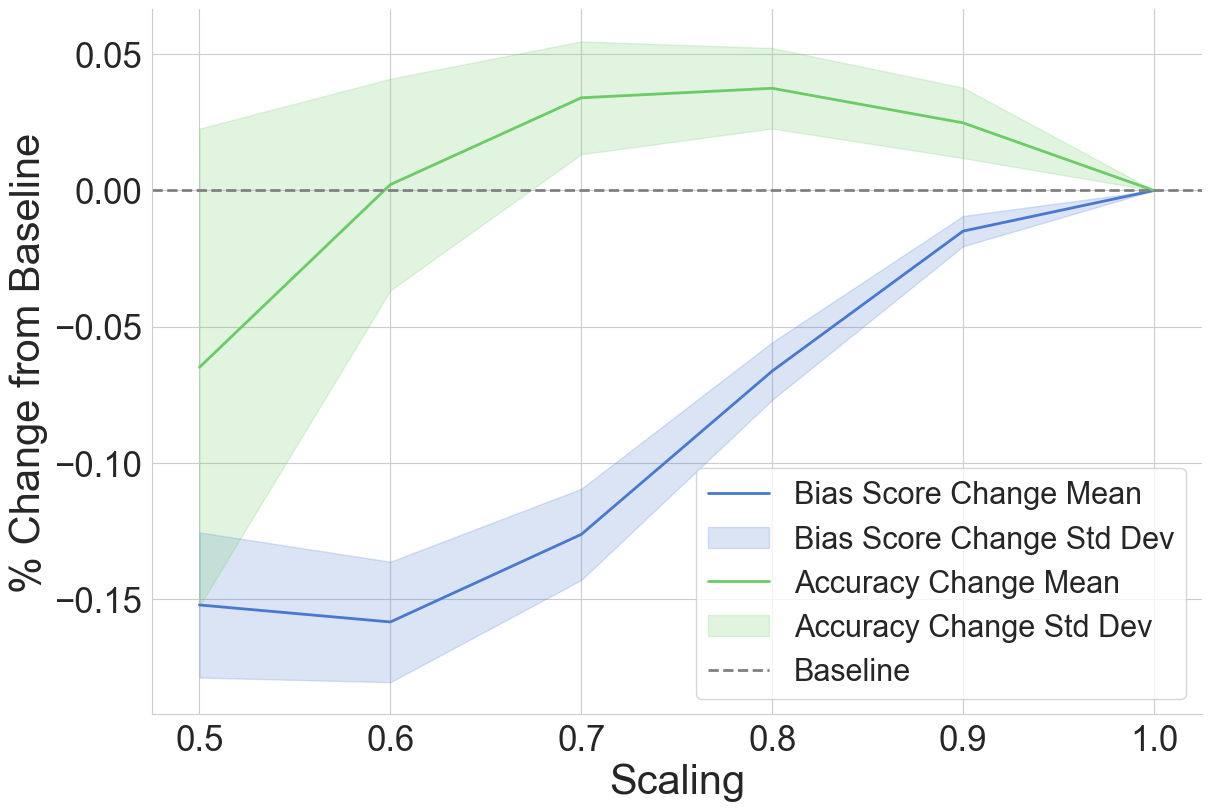

In [36]:
sns.set_style("whitegrid")
palette = sns.color_palette("muted", 4)

df_no_baseline = copy.deepcopy(df_scale)
df_no_baseline.loc[df_no_baseline['scale'] == 'baseline', 'scale'] = "0.0"
df_no_baseline['scale'] = 1 - df_no_baseline['scale'].astype(float)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

# Plot Std Change Mean with confidence interval
ax.plot(df_no_baseline['scale'], df_no_baseline['std_change_mean'], label='Bias Score Change Mean', color=palette[0], linewidth=2)
ax.fill_between(
    df_no_baseline['scale'],
    df_no_baseline['std_change_mean'] - df_no_baseline['std_change_std'],
    df_no_baseline['std_change_mean'] + df_no_baseline['std_change_std'],
    color=palette[0],
    alpha=0.2,
    label="Bias Score Change Std Dev"
)

# Plot Acc Change Mean with confidence interval
ax.plot(df_no_baseline['scale'], df_no_baseline['acc_change_mean'], label='Accuracy Change Mean', color=palette[2], linewidth=2)
ax.fill_between(
    df_no_baseline['scale'],
    df_no_baseline['acc_change_mean'] - df_no_baseline['acc_change_std'],
    df_no_baseline['acc_change_mean'] + df_no_baseline['acc_change_std'],
    color=palette[2],
    alpha=0.2,
    label="Accuracy Change Std Dev"
)

ax.axhline(y=0, color='grey', linestyle='--', linewidth=2, label='Baseline')

# Labels and title
ax.set_xlabel('Scaling', fontsize=30)
ax.set_ylabel('% Change from Baseline', fontsize=30)
ax.tick_params(axis='both', labelsize=25)
#ax.set_title('Change in Prompt Std and Accuracy from Baseline per Scaling Factor', fontsize=20, fontweight='bold')

ax.legend(fontsize=22, loc='best')

sns.despine()
plt.savefig('work/saved/plots/plot_debiasing_results.svg')
plt.show()